In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
file_path_a = 'SSDSE-A-2025.xlsx'
df = pd.read_excel(file_path_a, header=0, skiprows=[1])
# df = pd.read_excel(file_path_a, header=[0, 1])
# ヘッダーの数値を文字列に変換し、列名を結合
# df.columns = ['_'.join(map(str, col)).strip() for col in df.columns.values]

# 都道府県ごとのデータに集計するためのデータフレームを作成
df_a_pref = pd.DataFrame()

In [14]:
plt.rcParams['font.family'] = 'Hiragino Sans GB' # Macの場合の例
plt.rcParams['axes.unicode_minus'] = False # マイナス記号を正しく表示するため

岩手県の第一次産業従業者数の割合: 2.55%
全国順位: 20位

分析が完了しました。
以下のファイルが生成されました:
- primary_industry_ratio_by_prefecture.png (グラフ画像)
- prefecture_primary_industry_summary.csv (分析結果の要約)


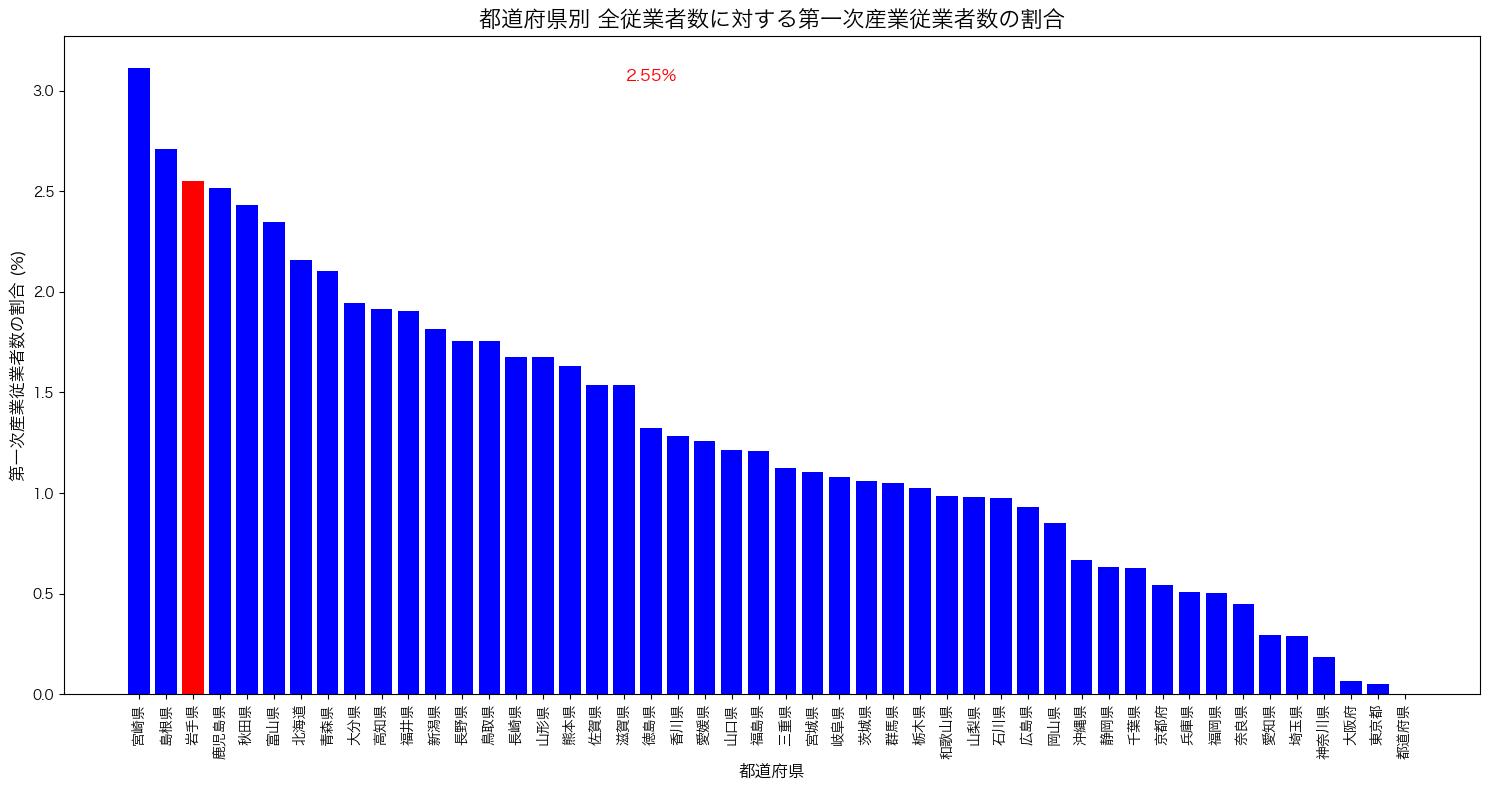

In [22]:


# # 日本語フォントの設定（IPAexGothicは多くの環境で利用可能）
# plt.rcParams['font.family'] = 'IPAexGothic'

# ----------------------------------------------------------------------
# データの読み込みと前処理
# ----------------------------------------------------------------------

# データAを読み込む
# ヘッダーとして最初の行（コード名）を使用し、2行目（日本語名）をスキップ
# df = pd.read_csv('SSDSE-A-2025.xlsx - SSDSE-A-2025.csv', header=0, skiprows=[1], encoding='utf-8')

# 'Prefecture'、'C2208'（全従業者数）、'C220832'（農業、林業従業者数）、'C220833'（漁業従業者数）
df_selected = df[['Prefecture', 'C2208', 'C220832', 'C220833']].copy()
df_selected.columns = ['Prefecture', 'Total_Workers', 'Agriculture_Forestry_Workers', 'Fishery_Workers']

# データクレンジングと型変換
# 欠損値やハイフンを0に置き換える
df_selected.replace('-', '0', inplace=True)
df_selected.replace(' ', '0', inplace=True)
df_selected.fillna(0, inplace=True)

# データ型を数値型に変換
for col in ['Total_Workers', 'Agriculture_Forestry_Workers', 'Fishery_Workers']:
    df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce').fillna(0)

# ----------------------------------------------------------------------
# 分析と計算
# ----------------------------------------------------------------------

# 第一次産業従業者数を計算（農業、林業 + 漁業）
df_selected['Primary_Industry_Workers'] = df_selected['Agriculture_Forestry_Workers'] + df_selected['Fishery_Workers']

# 都道府県ごとの合計を計算
df_prefecture_summary = df_selected.groupby('Prefecture').agg({
    'Primary_Industry_Workers': 'sum',
    'Total_Workers': 'sum'
}).reset_index()

# 都道府県ごとの全従業者数に対する第一次産業割合を計算
df_prefecture_summary['Primary_Industry_Ratio'] = (df_prefecture_summary['Primary_Industry_Workers'] / df_prefecture_summary['Total_Workers']) * 100
df_prefecture_summary.fillna(0, inplace=True)

# 第一次産業の割合で降順にソート
df_prefecture_summary_sorted = df_prefecture_summary.sort_values(by='Primary_Industry_Ratio', ascending=False)

# 岩手県のデータ抽出
iwate_data = df_prefecture_summary_sorted[df_prefecture_summary_sorted['Prefecture'] == '岩手県']

# ----------------------------------------------------------------------
# グラフ作成とファイル保存
# ----------------------------------------------------------------------

# グラフの色設定
prefectures = df_prefecture_summary_sorted['Prefecture']
ratios = df_prefecture_summary_sorted['Primary_Industry_Ratio']
colors = ['red' if prefecture == '岩手県' else 'blue' for prefecture in prefectures]

# 棒グラフを作成
plt.figure(figsize=(15, 8))
plt.bar(prefectures, ratios, color=colors)
plt.title('都道府県別 全従業者数に対する第一次産業従業者数の割合', fontsize=16)
plt.xlabel('都道府県', fontsize=12)
plt.ylabel('第一次産業従業者数の割合 (%)', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

# 岩手県の割合の値をグラフにテキストで表示
if not iwate_data.empty:
    iwate_ratio = iwate_data['Primary_Industry_Ratio'].iloc[0]
    iwate_rank_index = df_prefecture_summary_sorted.index[df_prefecture_summary_sorted['Prefecture'] == '岩手県'].tolist()[0]
    plt.text(iwate_rank_index, iwate_ratio + 0.5, f'{iwate_ratio:.2f}%', ha='center', color='red', fontweight='bold', fontsize=12)

# グラフをPNGファイルとして保存
plt.savefig('primary_industry_ratio_by_prefecture.png')

# ----------------------------------------------------------------------
# 結果の表示とCSV保存
# ----------------------------------------------------------------------

# 岩手県の割合と全国順位を特定
iwate_rank = df_prefecture_summary_sorted.index[df_prefecture_summary_sorted['Prefecture'] == '岩手県'].tolist()[0] + 1
iwate_ratio = df_prefecture_summary_sorted[df_prefecture_summary_sorted['Prefecture'] == '岩手県']['Primary_Industry_Ratio'].iloc[0]

# コンソールに結果を表示
print(f"岩手県の第一次産業従業者数の割合: {iwate_ratio:.2f}%")
print(f"全国順位: {iwate_rank}位")

# 最終結果をCSVファイルとして保存
df_prefecture_summary_sorted.to_csv('prefecture_primary_industry_summary.csv', index=False, encoding='utf-8-sig')

print("\n分析が完了しました。")
print("以下のファイルが生成されました:")
print("- primary_industry_ratio_by_prefecture.png (グラフ画像)")
print("- prefecture_primary_industry_summary.csv (分析結果の要約)")